<h3>Goal: Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).</h3>

<h4>Input(x) -> movie review</h4>

<h4>Output(y) -> sentiment</h4>

<h2>Importing the Required Libraries</h2>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Reading Dataset</h3>

In [44]:
df_review = pd.read_csv('IMDB Dataset.csv')
df_review

In [46]:
#taking a smaller sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
# 1000 positives
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb =pd.concat([df_positive,df_negative])

In [47]:
df_review_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
dtype: int64

<h2>Dealing with Imbalanced Classes</h2>

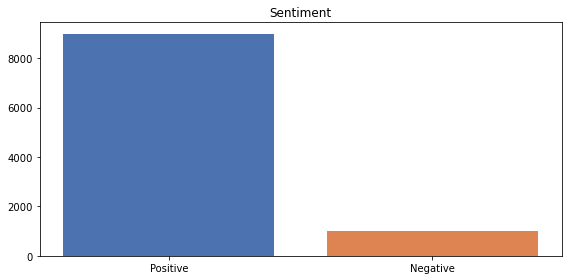

In [49]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [56]:
#from imblearn.under_sampling import  RandomUnderSampler

#rus = RandomUnderSampler(random_state=0)
#df_review_bal, df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])
#df_review_bal

# option 2
length_negative = len(df_review_imb[df_review_imb['sentiment']=='negative'])
df_review_positive = df_review_imb[df_review_imb['sentiment']=='positive'].sample(n=length_negative)
df_review_non_positive = df_review_imb[~(df_review_imb['sentiment']=='positive')]

df_review_bal = pd.concat([df_review_positive, df_review_non_positive])
df_review_bal.reset_index(drop=True, inplace=True)

In [57]:
print(df_review_bal['sentiment'].value_counts())
print(df_review_imb['sentiment'].value_counts())

positive    1000
negative    1000
Name: sentiment, dtype: int64
positive    9000
negative    1000
Name: sentiment, dtype: int64


<h2>Splitting data into train and test</h2>

In [61]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

In [63]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [70]:
print(train_y.value_counts())
print(test_y.value_counts())

positive    675
negative    665
Name: sentiment, dtype: int64
negative    335
positive    325
Name: sentiment, dtype: int64


<h2>Text Representation (Bag of Words)</h2>

The classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. We need to convert the text to a more manageable representation.

<h2>Count Vectorizer</h2>

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names_out())
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


<h2>Tfidf</h2>

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names_out())
df_dtm

,code,hate,java,love,python,writing
review1,0.438501,0.000000,0.000000,0.616298,0.616298,0.21925
review2,0.438501,0.616298,0.616298,0.000000,0.000000,0.21925


<h2>Turning our text data into numerical vectors</h2>

In [75]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words='english')
# train_x_vector = cv.fit_transform(train_x)
# test_x_vector = cv.transform(test_x)

In [76]:
train_x_vector

<1340x20483 sparse matrix of type '<class 'numpy.float64'>'
	with 118619 stored elements in Compressed Sparse Row format>

Types of matrix

1 Sparse matrix 


2 Dense matrix

In [79]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector, index=train_x.index, columns = tfidf.get_feature_names_out())

,00,000,007,00am,01,02,07,08,10,100,...,zoot,zp,zucker,zurn,zwick,zzzzzzzzzzzzzzzzzz,âge,æon,élan,être
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.181793,0.0,0.0,0.0,0.0


<h2>Model Building and Selection</h2>

<h3>Support Vector Machines (SVM)</h3>

In [91]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)
#svc.predict(train_x_vector[0])

array(['positive'], dtype=object)

<h3>Testing</h3>

In [86]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))
print(svc.predict(tfidf.transform(['It was a waste of money'])))
print(svc.predict(tfidf.transform(['The story was pathetic'])))
print(svc.predict(tfidf.transform(['Acting was upto the mark'])))

['positive']
['positive']
['negative']
['negative']
['negative']
['positive']


<h2>Decision Tree</h2>

In [92]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

<h2>Naive Bayes</h2>

In [93]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

<h2>Logistic Regression</h2>

In [95]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

<h1>Model Evaluation</h1>

<h3>Mean Accuracy</h3>

Return the mean accuracy on the given test data and labels.

In [97]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

# svc.score('Test samples', 'True labels')

0.8348484848484848
0.6893939393939394
0.6257575757575757
0.8272727272727273


<h2>F1 Score</h2>

F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it's useful when you have data with imbalance classes.

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [98]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.83851852, 0.83100775])

<h2>Classification report</h2>

Build a text report showing the main classification metrics.

In [99]:
from sklearn.metrics import classification_report

print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))
# classification_report(y_true, y_pred)

              precision    recall  f1-score   support

    positive       0.81      0.87      0.84       325
    negative       0.86      0.80      0.83       335

    accuracy                           0.83       660
   macro avg       0.84      0.84      0.83       660
weighted avg       0.84      0.83      0.83       660



<h2>Confusion Matrix</h2>

A confusion matrix) is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives

In [100]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])
conf_mat

array([[283,  42],
       [ 67, 268]], dtype=int64)